In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [166]:
mnist_data = pd.read_csv("mnist_test.csv")
mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
np.random.seed(0)
mnist = pd.DataFrame(columns=mnist_data.columns, dtype='int64')
for i in range(10):
    samples = mnist_data[mnist_data.label==i].sample(50, replace=False)
    mnist = pd.concat([mnist, samples], ignore_index=True)

mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
mnist.to_csv(r'sample_mnist.csv', index=False)

In [215]:
mnist_fea = mnist.drop('label', axis = 1)
mnist_label = mnist['label']

In [217]:
np.random.seed(0)

In [218]:
def to_matrix(row):
    mat = mnist_fea.iloc[row].to_numpy().reshape(28, 28)
    return mat

In [219]:
def plot_image(row):
    plt.imshow(to_matrix(row), cmap='gray')

In [351]:
def to_coord(row):
    dig = np.transpose(np.where(to_matrix(row) > 200))
    dig[:, [0, 1]] = dig[:, [1, 0]]
    dig[:, 1] = 28 - dig[:, 1]
    dig = (dig * 100) / 28
    return dig

In [352]:
def plot_coord(row):
    coord = to_coord(row)
    plt.figure(figsize=(5, 5))
    plt.scatter(coord[:, 0], coord[:, 1])
    plt.xlim([0, 100])
    plt.ylim(0, 100)
    plt.show()

3


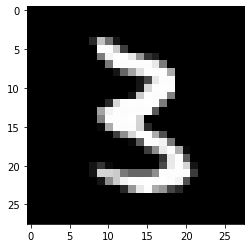

7


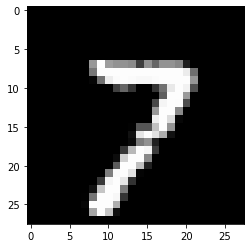

6


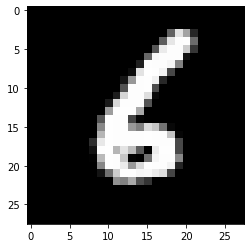

In [353]:
for i in np.random.randint(0, 500, 3):
    print(mnist_label[i])
    plot_image(i)
    plt.show()

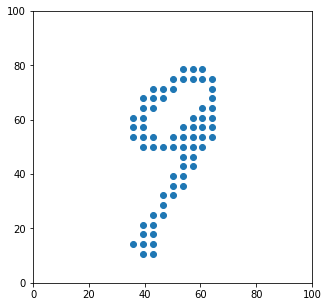

In [354]:
plot_coord(451)

In [355]:
def clust(row):
    np.random.seed(0)
    kmeans = KMeans().fit(to_coord(row))
    return kmeans

In [356]:
def plot_clus(kmeans,row):
    coord = to_coord(row)
    plt.figure(figsize=(5, 5))
    plt.scatter(coord[:, 0], coord[:, 1], c=kmeans.predict(to_coord(row)))
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', color='k')
    plt.xlim([0, 100])
    plt.ylim(0, 100)
    plt.show()

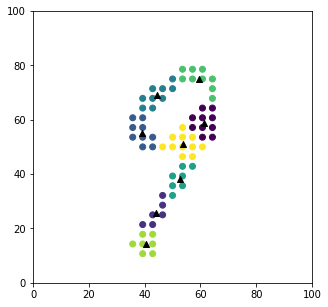

In [357]:
row=451
kmeans = clust(row)
plot_clus(kmeans,row)


In [358]:
len(kmeans.cluster_centers_)
kmeans.cluster_centers_

array([[61.42857143, 58.92857143],
       [44.04761905, 25.5952381 ],
       [38.88888889, 55.15873016],
       [44.44444444, 69.04761905],
       [52.55102041, 38.26530612],
       [59.52380952, 75.        ],
       [40.30612245, 14.28571429],
       [53.8961039 , 50.97402597]])

In [359]:
def top_left_index(kmeans):
    tl = [0, 100]
    ld = 100
    li = 0
    for i in range(len(kmeans.cluster_centers_)):
        dist = np.linalg.norm(tl - kmeans.cluster_centers_[i])
        if dist < ld:
            ld = dist
            li = i
    return li

In [360]:
li = top_left_index(kmeans)
print(li)

3


In [361]:
kmeans.cluster_centers_[li]

array([44.44444444, 69.04761905])